In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [3]:
df = pd.read_csv('D:\E-commerce data.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,Customer ID,Product ID,Order ID,Customer Age,Gender,Product Name,MRP,Discount Price,Category,State,City,Subscription,Bill Number,Time Spent on Website,Rating,Marketing/Advertisement,Ship Mode,Order Status,Order Date,Delivery Date,Cancellation Date,Payment Method,Pin Code,Total Order Value,Payment Status,No of Clicks,Year,Month,Shipping Charges
0,YSB75,BW653,479577309,28,Female,Ariel Matic Top Load Liquid Detergent,977.44,909.02,Imported,Andhra Pradesh,Rajahmundry,Premium,1.240170e+11,4.18,1.0,Instagram,Free,Shipped,05-05-2022,13-05-2022,NaN,Credit,318324,909.02,Paid,29,2022,May,0
1,FUS93,XV061,634865221,47,Male,VSR Channa Dal,834.09,450.41,Branded,Telangana,Nalgonda,Freepass,2.135730e+11,7.51,2.6,Facebook,Free,Shipped,13-08-2021,20-08-2021,NaN,Debit,730162,450.41,Paid,95,2021,August,0
2,AJP28,GF695,113166210,63,Female,Tenali Double Horse Chana Dal,1095.20,1007.58,Branded,Gujarat,Junagadh,Freepass,2.132130e+11,1.79,1.1,Instagram,Free,Delivered,17-10-2021,26-10-2021,NaN,Debit,694091,1007.58,Paid,51,2021,October,0
3,URC55,VM478,740539230,41,Male,Tata Tea,748.16,389.04,Imported,Maharashtra,Nagpur,Freepass,5.435620e+11,1.15,4.8,Other,Priority,Delivered,25-08-2021,27-08-2021,NaN,Credit,211807,489.04,Pending,12,2021,August,100
4,ZOP23,XD230,156544145,22,Female,VSR Channa Dal,1249.04,911.80,Local,Gujarat,Vadodara,Freepass,9.475540e+11,1.31,1.4,Other,Priority,Shipped,08-12-2023,10-12-2023,NaN,Credit,78304,1011.8,Paid,26,2023,December,100


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer ID              25000 non-null  object 
 1   Product ID               25000 non-null  object 
 2   Order ID                 25000 non-null  int64  
 3   Customer Age             25000 non-null  int64  
 4   Gender                   25000 non-null  object 
 5   Product Name             25000 non-null  object 
 6   MRP                      25000 non-null  float64
 7   Discount Price           25000 non-null  float64
 8   Category                 25000 non-null  object 
 9   State                    25000 non-null  object 
 10  City                     25000 non-null  object 
 11  Subscription             25000 non-null  object 
 12  Bill Number              25000 non-null  float64
 13  Time Spent on Website    25000 non-null  float64
 14  Rating                

In [5]:
df.isnull().sum()

Customer ID                    0
Product ID                     0
Order ID                       0
Customer Age                   0
Gender                         0
Product Name                   0
MRP                            0
Discount Price                 0
Category                       0
State                          0
City                           0
Subscription                   0
Bill Number                    0
Time Spent on Website          0
Rating                         0
Marketing/Advertisement        0
Ship Mode                      0
Order Status                   0
Order Date                     0
Delivery Date                  0
Cancellation Date          23216
Payment Method                 0
Pin Code                       0
Total Order Value              0
Payment Status                 0
No of Clicks                   0
Year                           0
Month                          0
Shipping Charges               0
dtype: int64

In [6]:
df.describe()

,Order ID,Customer Age,MRP,Discount Price,Bill Number,Time Spent on Website,Rating,Pin Code,No of Clicks,Year
count,2.500000e+04,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.987130e+08,43.856600,1013.746646,735.621509,5.016699e+11,10.150932,3.008728,496731.079480,50.423040,2022.002200
std,2.881895e+08,15.285775,571.079711,441.362817,2.887199e+11,10.965989,1.159525,287726.921162,28.867925,0.816714
min,1.912800e+04,18.000000,20.040000,10.910000,2.349474e+07,1.000000,1.000000,5.000000,1.000000,2021.000000
25%,2.503746e+08,31.000000,523.995000,367.665000,2.540238e+11,2.980000,2.000000,247984.500000,26.000000,2021.000000
50%,4.997311e+08,44.000000,1014.415000,713.140000,5.019725e+11,5.000000,3.000000,495215.500000,50.000000,2022.000000
75%,7.471021e+08,57.000000,1506.812500,1061.347500,7.519322e+11,13.430000,4.000000,745846.250000,76.000000,2023.000000
max,9.999131e+08,70.000000,1999.920000,1876.220000,9.999160e+11,59.970000,5.000000,999997.000000,100.000000,2023.000000


Converting Date Columns to datetime

In [7]:
date_cols = ['Order Date', 'Delivery Date', 'Cancellation Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], dayfirst=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer ID              25000 non-null  object        
 1   Product ID               25000 non-null  object        
 2   Order ID                 25000 non-null  int64         
 3   Customer Age             25000 non-null  int64         
 4   Gender                   25000 non-null  object        
 5   Product Name             25000 non-null  object        
 6   MRP                      25000 non-null  float64       
 7   Discount Price           25000 non-null  float64       
 8   Category                 25000 non-null  object        
 9   State                    25000 non-null  object        
 10  City                     25000 non-null  object        
 11  Subscription             25000 non-null  object        
 12  Bill Number              25000 n

In [9]:
df.head()

,Customer ID,Product ID,Order ID,Customer Age,Gender,Product Name,MRP,Discount Price,Category,State,City,Subscription,Bill Number,Time Spent on Website,Rating,Marketing/Advertisement,Ship Mode,Order Status,Order Date,Delivery Date,Cancellation Date,Payment Method,Pin Code,Total Order Value,Payment Status,No of Clicks,Year,Month,Shipping Charges
0,YSB75,BW653,479577309,28,Female,Ariel Matic Top Load Liquid Detergent,977.44,909.02,Imported,Andhra Pradesh,Rajahmundry,Premium,1.240170e+11,4.18,1.0,Instagram,Free,Shipped,2022-05-05,2022-05-13,NaT,Credit,318324,909.02,Paid,29,2022,May,0
1,FUS93,XV061,634865221,47,Male,VSR Channa Dal,834.09,450.41,Branded,Telangana,Nalgonda,Freepass,2.135730e+11,7.51,2.6,Facebook,Free,Shipped,2021-08-13,2021-08-20,NaT,Debit,730162,450.41,Paid,95,2021,August,0
2,AJP28,GF695,113166210,63,Female,Tenali Double Horse Chana Dal,1095.20,1007.58,Branded,Gujarat,Junagadh,Freepass,2.132130e+11,1.79,1.1,Instagram,Free,Delivered,2021-10-17,2021-10-26,NaT,Debit,694091,1007.58,Paid,51,2021,October,0
3,URC55,VM478,740539230,41,Male,Tata Tea,748.16,389.04,Imported,Maharashtra,Nagpur,Freepass,5.435620e+11,1.15,4.8,Other,Priority,Delivered,2021-08-25,2021-08-27,NaT,Credit,211807,489.04,Pending,12,2021,August,100
4,ZOP23,XD230,156544145,22,Female,VSR Channa Dal,1249.04,911.80,Local,Gujarat,Vadodara,Freepass,9.475540e+11,1.31,1.4,Other,Priority,Shipped,2023-12-08,2023-12-10,NaT,Credit,78304,1011.8,Paid,26,2023,December,100


# Data Cleaning & Preprocessing

Creating New Columns

In [10]:
df['Order Processing Time'] = (df['Delivery Date'] - df['Order Date']).dt.days
df['Discount Percentage'] = ((df['MRP'] - df['Discount Price']) / df['MRP']) * 100

Remove duplicates

In [11]:
df = df.drop_duplicates()

Checking Negative Values

In [12]:
print((df.select_dtypes(include=['number']) < 0).sum())

Order ID                 0
Customer Age             0
MRP                      0
Discount Price           0
Bill Number              0
Time Spent on Website    0
Rating                   0
Pin Code                 0
No of Clicks             0
Year                     0
Order Processing Time    0
Discount Percentage      0
dtype: int64


Converting Total Order Value to numeric (handling 'cancelled' & 'Returned')

In [13]:
df['Total Order Value'] = pd.to_numeric(df['Total Order Value'], errors='coerce')

Filter valid orders (excluding 'cancelled' & 'returned')

In [14]:
valid_orders = df[df['Order Status'].isin(['Delivered', 'Shipped'])].copy()

Extracting Year-Month for trend analysis

In [15]:
valid_orders['YearMonth'] = valid_orders['Order Date'].dt.to_period('M')

# Basic Analysis

Total Revenue and Total Orders

In [16]:
total_revenue = valid_orders['Total Order Value'].sum()
print('Total Revenue:', total_revenue)
total_orders = valid_orders.shape[0]
print('Total Orders:', total_orders)

Total Revenue: 16954109.33
Total Orders: 21866


Revenue By Gender

In [17]:
gender_revenue = valid_orders.groupby('Gender')['Total Order Value'].sum().reset_index()

total_revenue = gender_revenue['Total Order Value'].sum()
gender_revenue['Revenue Percentage'] = (gender_revenue['Total Order Value'] / total_revenue) * 100

gender_revenue['Revenue Percentage'] = gender_revenue['Revenue Percentage'].round(2)

gender_revenue

,Gender,Total Order Value,Revenue Percentage
0,Female,7265368.77,42.85
1,Male,9688740.56,57.15


In [18]:
avg_delivery_days = df['Order Processing Time'].mean()
print('Average Delivery Days :', avg_delivery_days)

Average Delivery Days : 6.26588


Cancellation Rate & Return Rate

In [19]:
total_orders = len(df)
#cancellation_rate
canceled_orders = len(df[df['Order Status'] == 'Cancelled'])
cancellation_rate = (canceled_orders / total_orders) * 100

#return rate
returned_orders = len(df[df['Order Status'] == 'Returned'])
return_rate = (returned_orders / total_orders) * 100

rate_df = pd.DataFrame({
    'Metric': ['Cancelation Rate', 'Return Rate'],
    'Percentage': [cancellation_rate, return_rate]
})

display(rate_df.style.set_caption("Cancellation and Return Rate"))



,Metric,Percentage
0,Cancelation Rate,7.136000
1,Return Rate,5.400000


# Exploratory Data Analysis (EDA)

Order Status Distribution

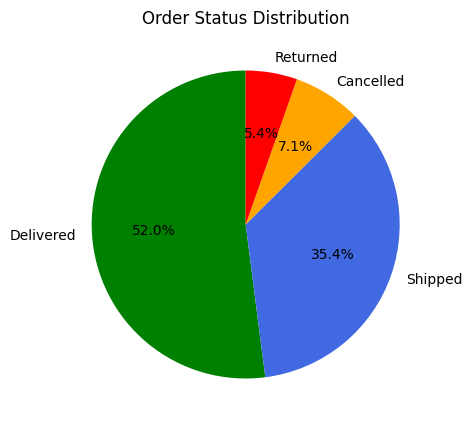

In [52]:
order_status_counts = df['Order Status'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(order_status_counts, labels = order_status_counts.index, autopct = '%1.1f%%', colors = ['green', 'royalblue', 'orange', 'red'], startangle = 90)
plt.title('Order Status Distribution')
plt.show()

Revenue By Category

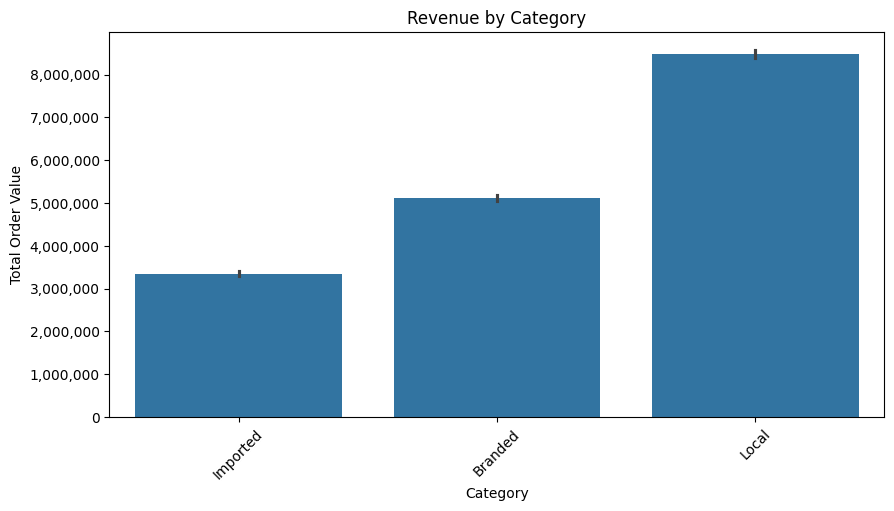

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Total Order Value", data=valid_orders, estimator=sum)
plt.title("Revenue by Category")
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


In [54]:
# Local Category Products Genrate Most Revenue

Monthly Revenue Trend

In [22]:
monthly_revenue = valid_orders.groupby('YearMonth')['Total Order Value'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

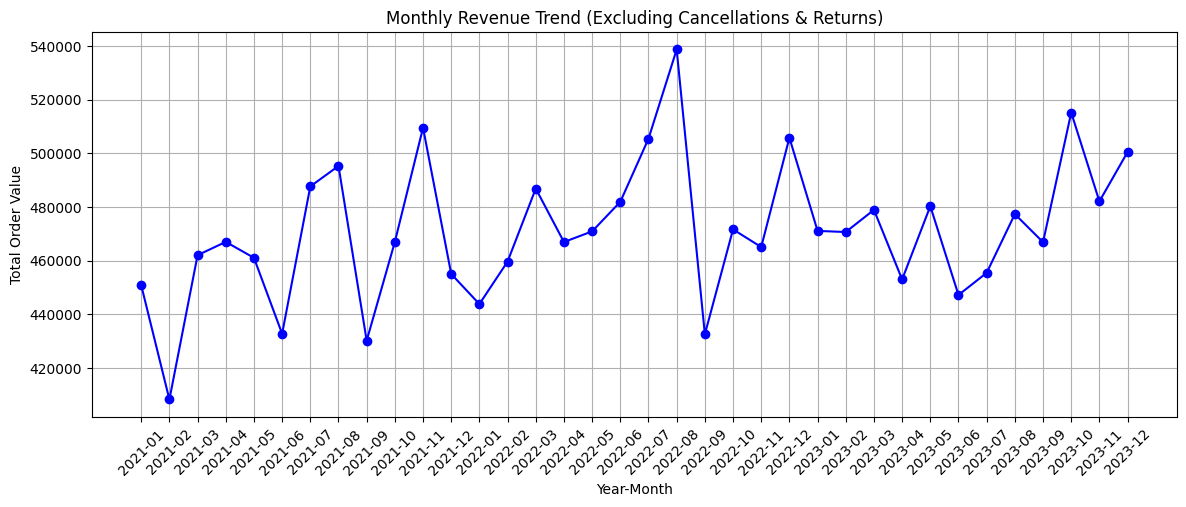

In [23]:
plt.figure(figsize=(14,5))
plt.plot(monthly_revenue['YearMonth'], monthly_revenue['Total Order Value'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Order Value')
plt.title('Monthly Revenue Trend (Excluding Cancellations & Returns)')
plt.grid(True)
plt.show()

In [53]:
# From The Above Chart We can Conclude That the Lowest Dip Of revenue was in february-2021 and highest peak was on august-2022

Yearly Revenue Trend

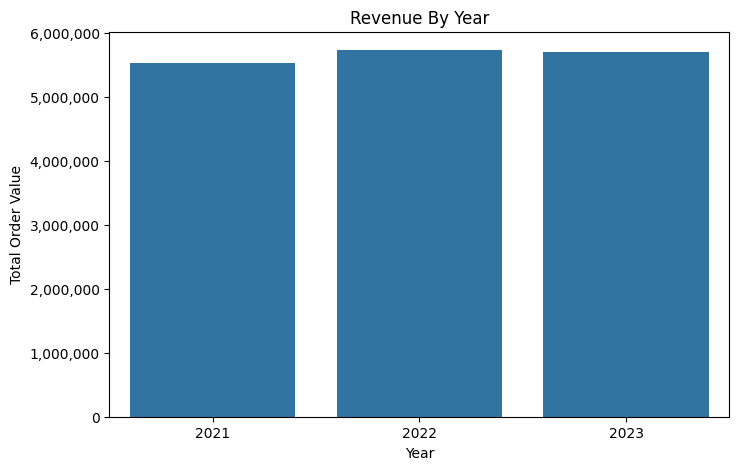

In [24]:
yearly_revenue = valid_orders.groupby('Year')['Total Order Value'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x = 'Year', y = 'Total Order Value', data = yearly_revenue)
plt.title('Revenue By Year')

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [55]:
# Revenue Trend By Years Is Almost Similar and Stable

# Shipping & Delivery Performance Analysis

In [25]:
valid_orders['Delivery Time (Days)'] = (valid_orders['Delivery Date'] - valid_orders['Order Date']).dt.days

Average Delivery Time Per Category

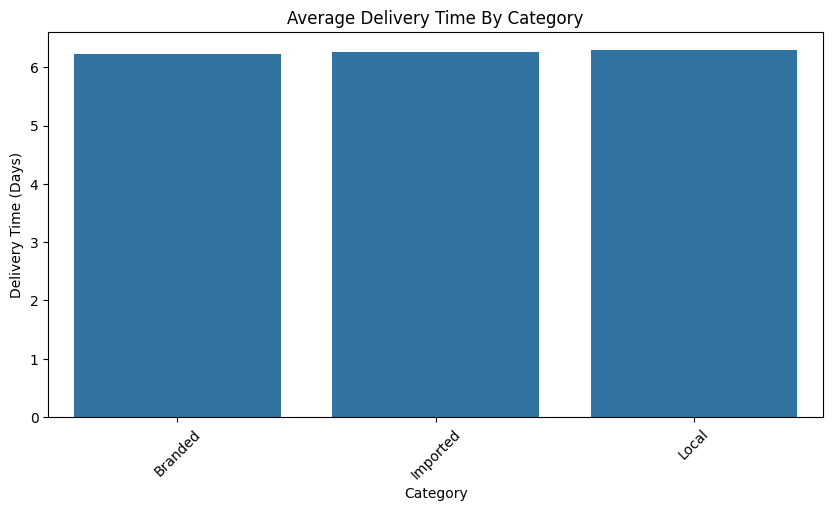

In [60]:
avg_delivery_time = valid_orders.groupby('Category')['Delivery Time (Days)'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x = 'Category', y = 'Delivery Time (Days)', data = avg_delivery_time)
plt.title('Average Delivery Time By Category')
plt.xticks(rotation=45)
plt.show()

In [56]:
# All Categories Have nearly equal Average Delivery Time

Delivery Performance Distribution

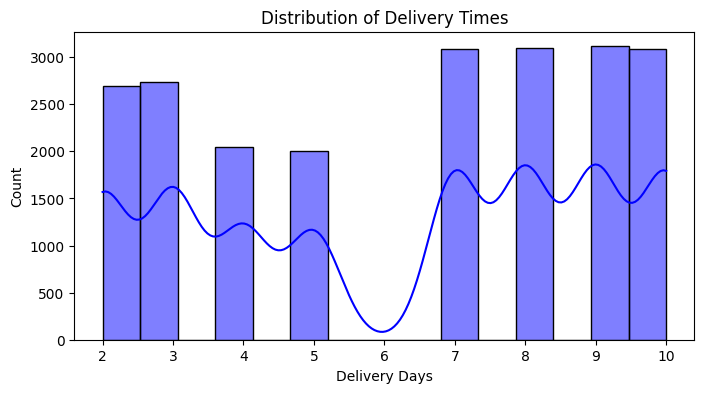

In [62]:
plt.figure(figsize=(8, 4))
sns.histplot(valid_orders["Delivery Time (Days)"], bins=15, kde=True, color = 'blue')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Days")
plt.show()

In [57]:
#Most of the orders are delivered within 7-10 days

Shipping and Delivery Efficiency

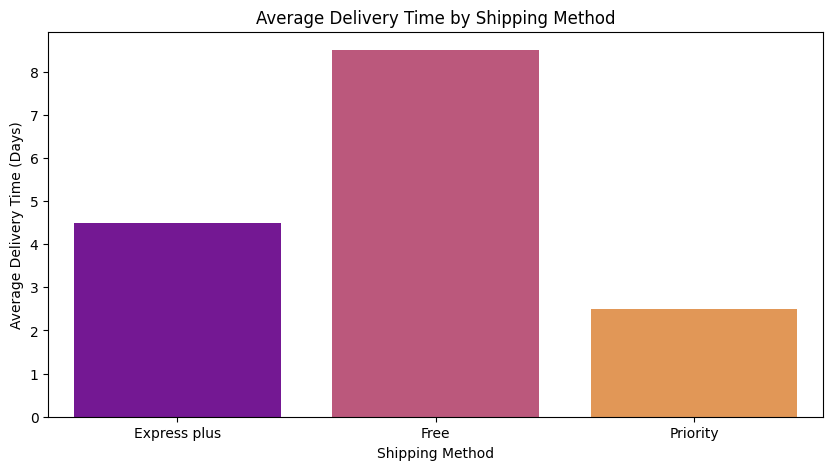

In [28]:
avg_delivery = valid_orders.groupby('Ship Mode')['Delivery Time (Days)'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x = 'Ship Mode', y = 'Delivery Time (Days)', data = avg_delivery,hue = 'Ship Mode', palette = 'plasma')
plt.xlabel('Shipping Method')
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time by Shipping Method')
plt.show()

In [58]:
# Free Shipping Method is the Slowest in terms of average delivery time 

# Advance Revenue Analysis

Top 10 Best Selling Products (by sales count)

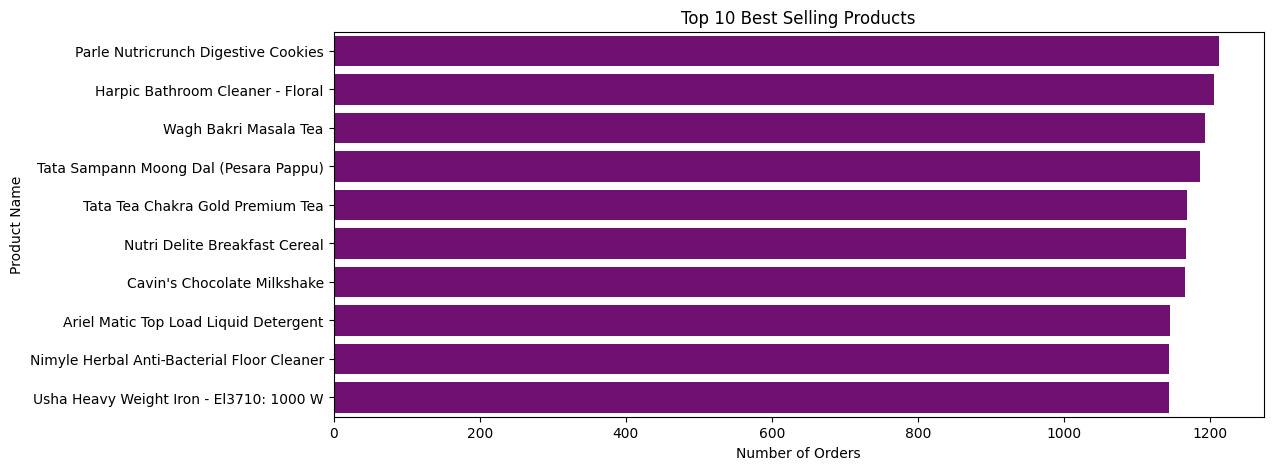

In [29]:
top_products = df['Product Name'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(y = top_products.index, x = top_products.values, color = 'purple')
plt.xlabel('Number of Orders')
plt.title('Top 10 Best Selling Products')
plt.show()

In [59]:
#Parle Nutricrunch Digestive Cookies is the most sold product

Top 10 Products By Total Revenue

Text(0.5, 0, 'Revenue')

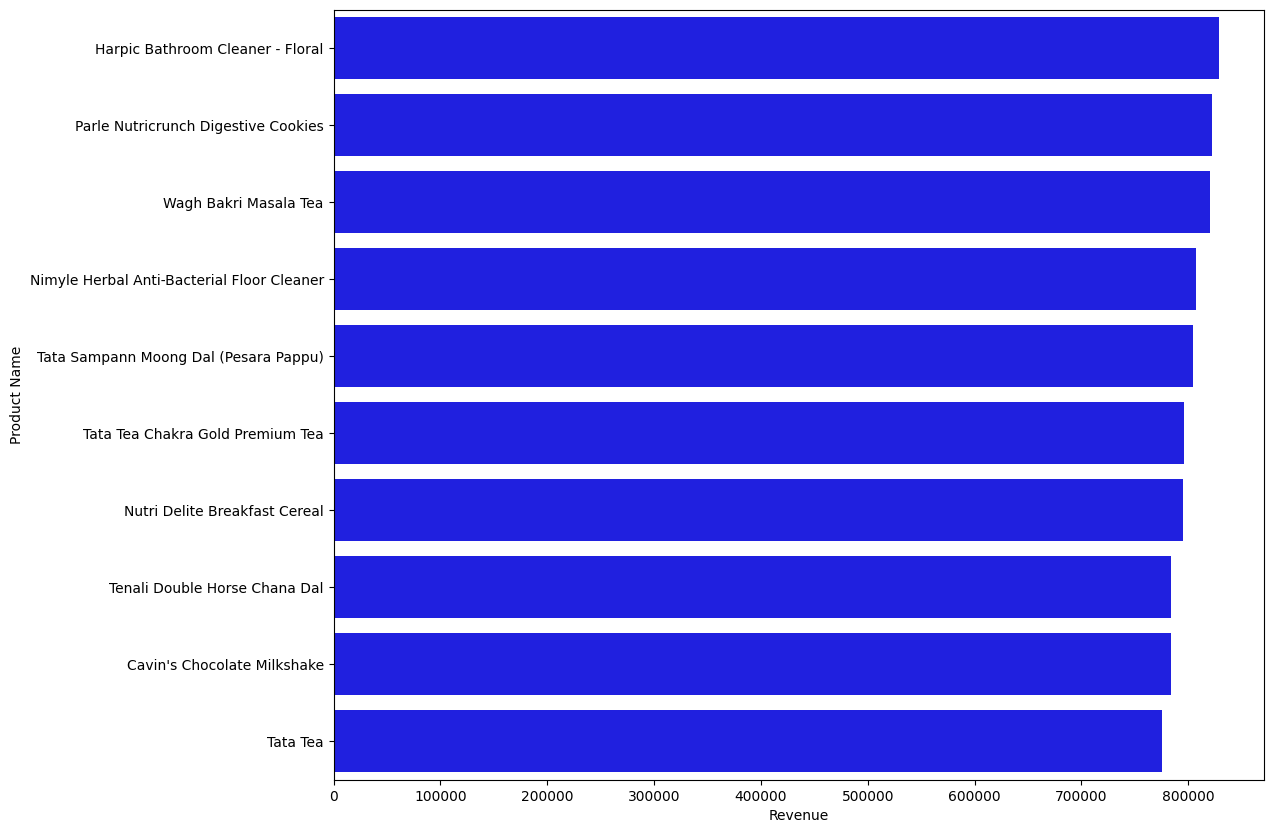

In [30]:
top_revenue_products = valid_orders.groupby('Product Name')['Total Order Value'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12,10))
sns.barplot(x = 'Total Order Value', y = 'Product Name', data = top_revenue_products, color = 'blue')
plt.xlabel('Revenue')


In [ ]:
#Harphic Bathroom Cleaner-Floral is the most revenue generating product

Revenue vs Discounts

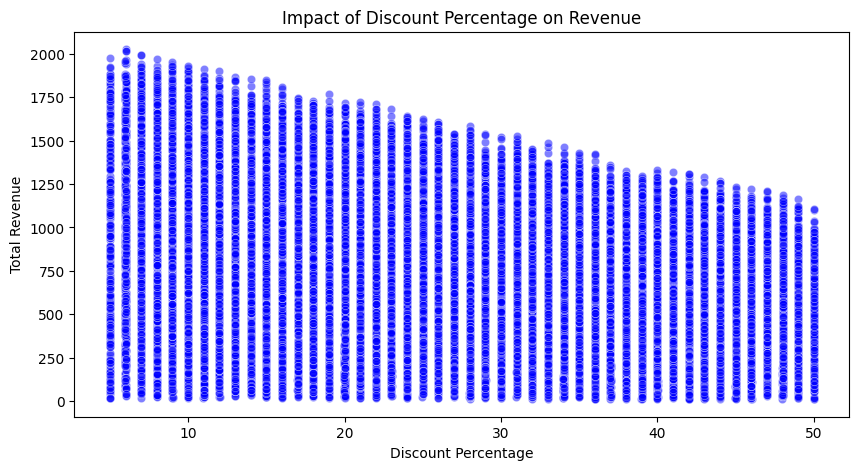

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=valid_orders["Discount Percentage"], y=valid_orders["Total Order Value"], alpha=0.5, color="blue")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Revenue")
plt.title("Impact of Discount Percentage on Revenue")
plt.show()

In [ ]:
# The scatter plot shows a negative correlation between discount percentage and total revenue,
# indicating that higher discounts are associated with lower revenue. 
# This suggests that while discounts may increase sales volume, they can also reduce overall revenue.

Revenue By Payment Method

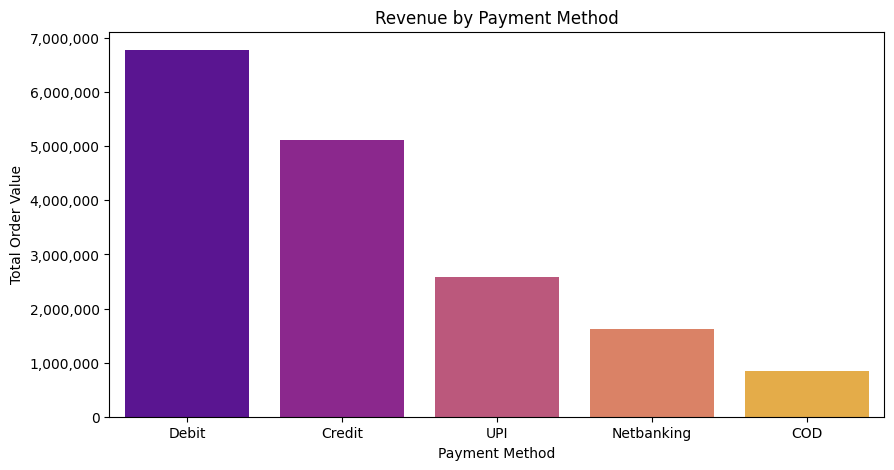

In [32]:
payment_revenue = valid_orders.groupby('Payment Method')['Total Order Value'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x = 'Payment Method', y = 'Total Order Value', data = payment_revenue,hue = 'Payment Method', palette = 'plasma')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Payment Method')
plt.ylabel('Total Order Value')
plt.title('Revenue by Payment Method')
plt.show()

In [74]:
# The most revenue generating payment method is Debit Card

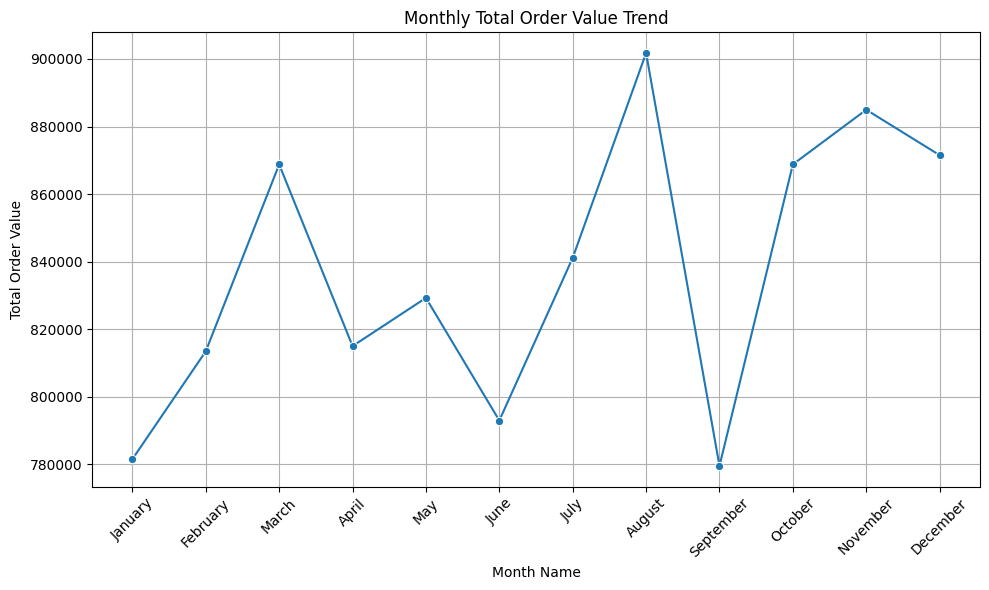

In [78]:

valid_orders = df[df["Order Status"] == "Delivered"].copy()
valid_orders['Month Name'] = valid_orders['Order Date'].dt.strftime('%B')


month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]


valid_orders['Month Name'] = pd.Categorical(valid_orders['Month Name'], categories=month_order, ordered=True)


monthly_orders = valid_orders.groupby("Month Name", observed=False)["Total Order Value"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Month Name", y="Total Order Value", data=monthly_orders, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Total Order Value Trend")
plt.grid(True)  
plt.tight_layout()
plt.show()


In [80]:
# The above chart shows that peak sales most likely occur in the month of August,
#  while the lowest sales most likely occur in February.

Revenue By Customer Segment

In [34]:
# Creating Customer Age Segments
age_bins = [18,24,34,44,54,100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55+']

valid_orders['Customer Age Segment'] = pd.cut(valid_orders['Customer Age'], bins = age_bins, labels = age_labels, right = True)
valid_orders['Customer Age Segment'].value_counts()

Customer Age Segment
55+      6545
25-34    4198
35-44    4137
45-54    4106
18-24    2453
Name: count, dtype: int64

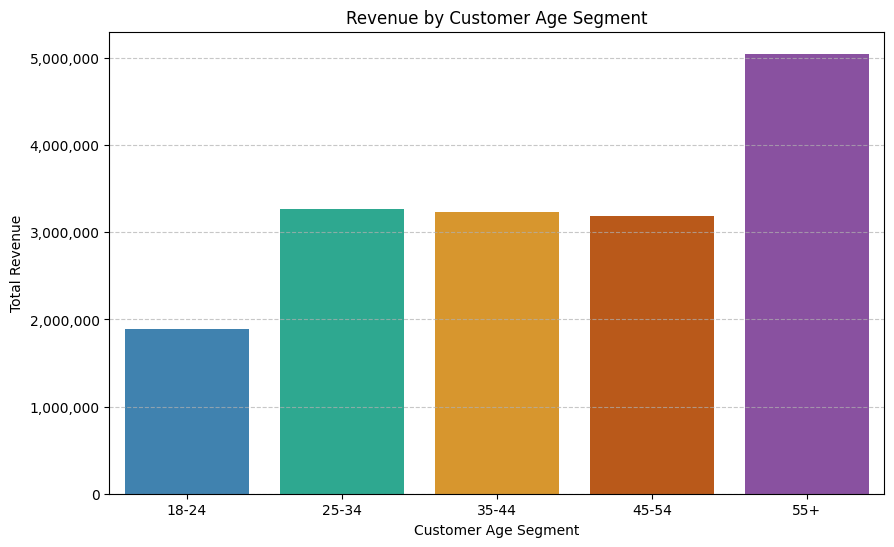

In [35]:
segment_revenue = valid_orders.groupby('Customer Age Segment', observed= False)['Total Order Value'].sum().reset_index().sort_values(by='Total Order Value', ascending=False)


colors = ["#2E86C1", "#1ABC9C", "#F39C12", "#D35400", "#8E44AD"]
plt.figure(figsize=(10,6))
sns.barplot(x = 'Customer Age Segment', y = 'Total Order Value', data = segment_revenue,hue = 'Customer Age Segment', palette = colors)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Customer Age Segment')
plt.ylabel('Total Revenue')
plt.title('Revenue by Customer Age Segment')
plt.grid( axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [81]:
# The age segment 55+ generates the most revenue, while the 18-24 age segment generates the least revenue.

Revenue By States

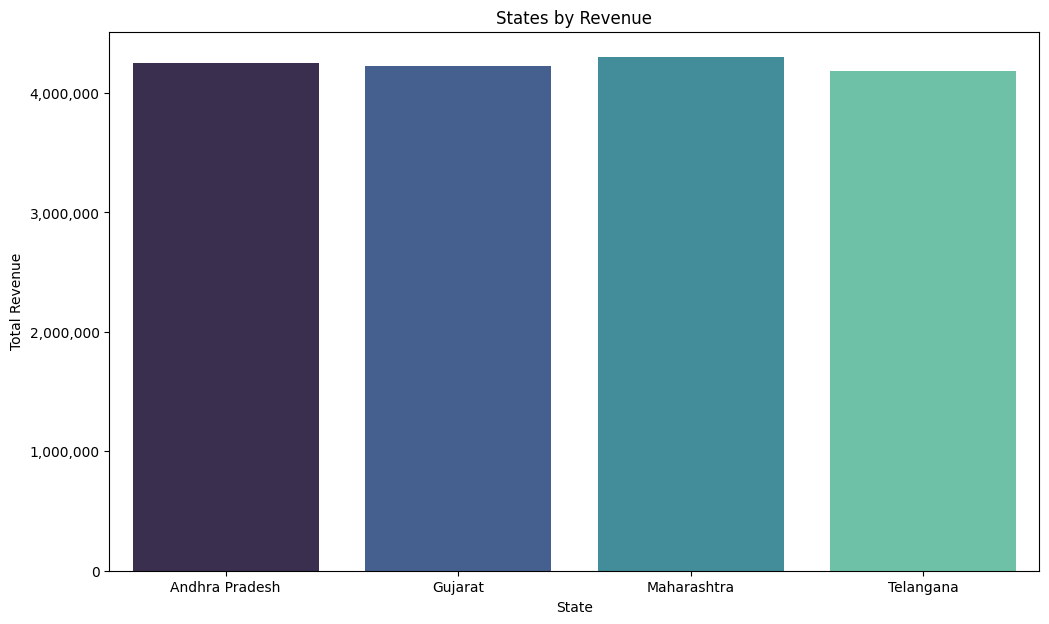

In [36]:
top_states = valid_orders.groupby('State')['Total Order Value'].sum().reset_index()

plt.figure(figsize=(12,7))
sns.barplot(x = 'State', y = 'Total Order Value', data = top_states, hue = 'State', palette ='mako')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.title('States by Revenue')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


In [ ]:
# All Given States Have Similar Revenue Generation

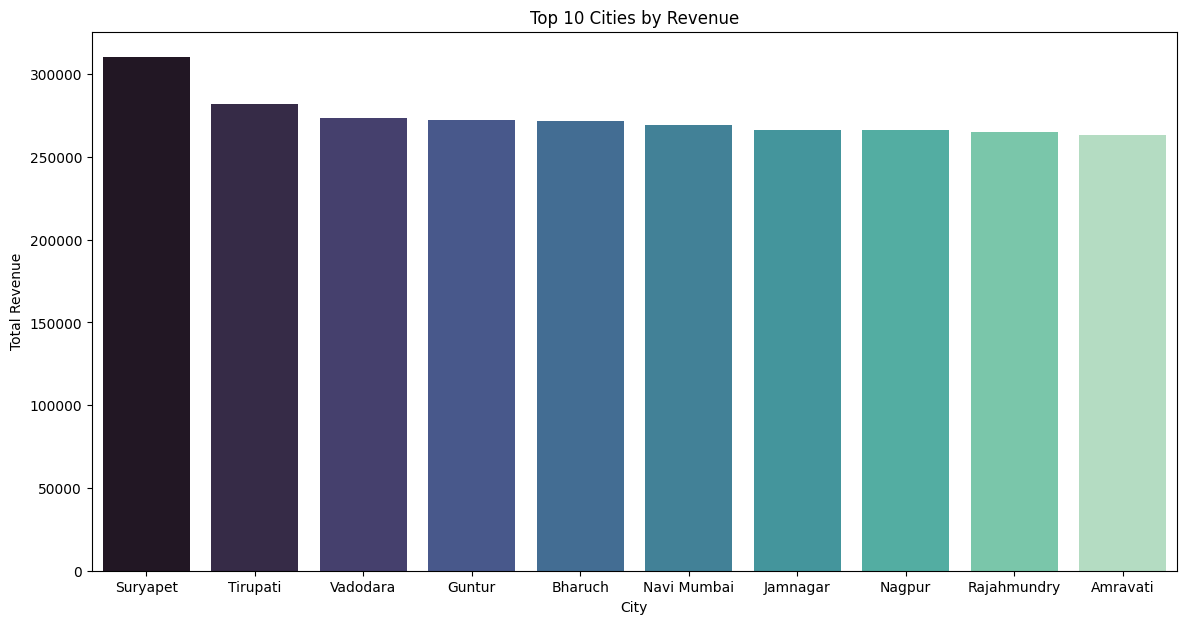

In [84]:
# Top 10 cities by revenue
top_cities = valid_orders.groupby("City")["Total Order Value"].sum().reset_index().nlargest(10, "Total Order Value")

plt.figure(figsize=(14, 7))
sns.barplot(x= 'City',  y = 'Total Order Value', data = top_cities,hue = 'City', palette="mako")
plt.xticks(rotation=0)
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.title("Top 10 Cities by Revenue")
plt.show()


In [83]:
# The top 10 cities by revenue are all in the almost same range, with the highest being "Suryapet" and the lowest being "Nagpur".

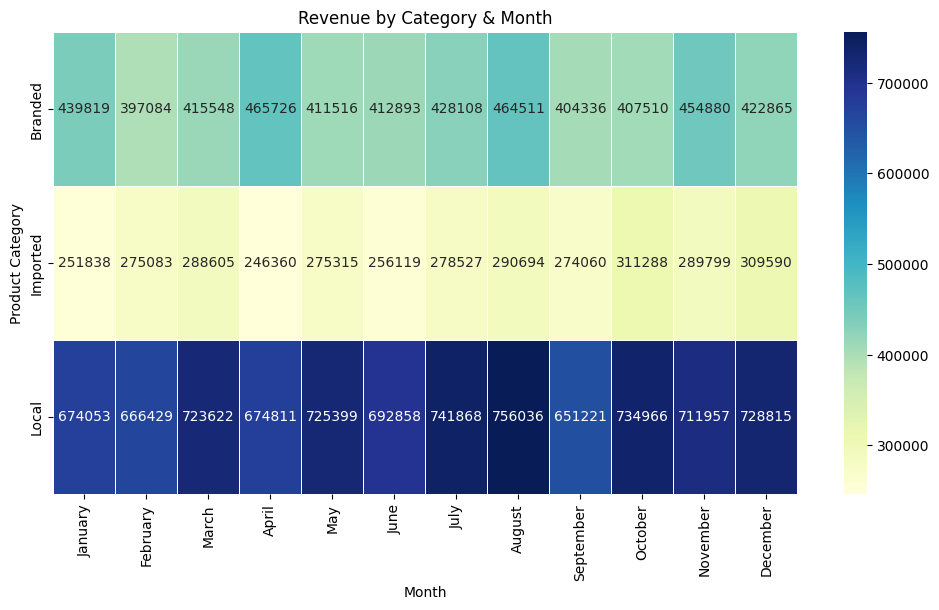

In [38]:
# Pivot table: Total Order Value by Category and Month
category_month_revenue = valid_orders.pivot_table(index="Category", columns="Month", values="Total Order Value", aggfunc="sum")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(category_month_revenue, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Revenue by Category & Month")
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.show()


In [85]:
# The heatmap shows the revenue generated by each product category for each month.
# The highest revenue is generated in the month of August by Local Category products, 
# while the lowest revenue is generated in February by Imported Category products.

Revenue By Subscription Status

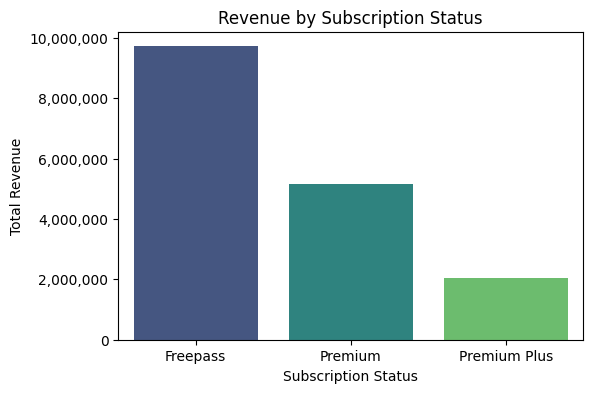

In [39]:
subscription_revenue = valid_orders.groupby('Subscription')['Total Order Value'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x = 'Subscription',y = 'Total Order Value', data = subscription_revenue,hue = 'Subscription', palette= 'viridis')
plt.xlabel('Subscription Status')
plt.ylabel('Total Revenue')
plt.title('Revenue by Subscription Status')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [86]:
# Most of the revenue is generated by Non-Subscription customers, while Premium Plus customers generate the least revenue.

Revenue By Marketing

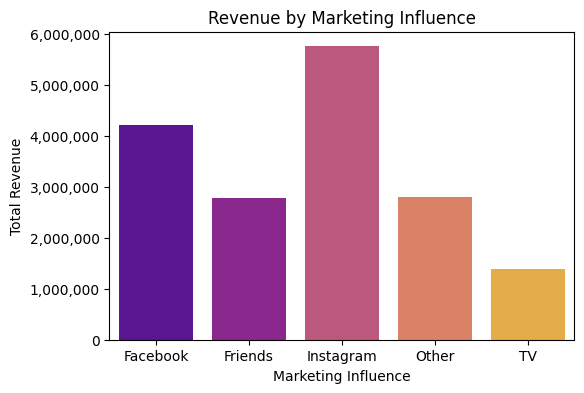

In [40]:
marketing_revenue = valid_orders.groupby('Marketing/Advertisement')['Total Order Value'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x = 'Marketing/Advertisement',y = 'Total Order Value', data = marketing_revenue,hue = 'Marketing/Advertisement', palette= 'plasma')
plt.xlabel('Marketing Influence')
plt.ylabel('Total Revenue')
plt.title('Revenue by Marketing Influence')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [87]:
# most of the revenue is generated by insatgram marketing, while the least revenue is generated by TV.

## Marketing Channel & Interface Performance Analysis

Subscription Analysis (Churn Impact & CLV)

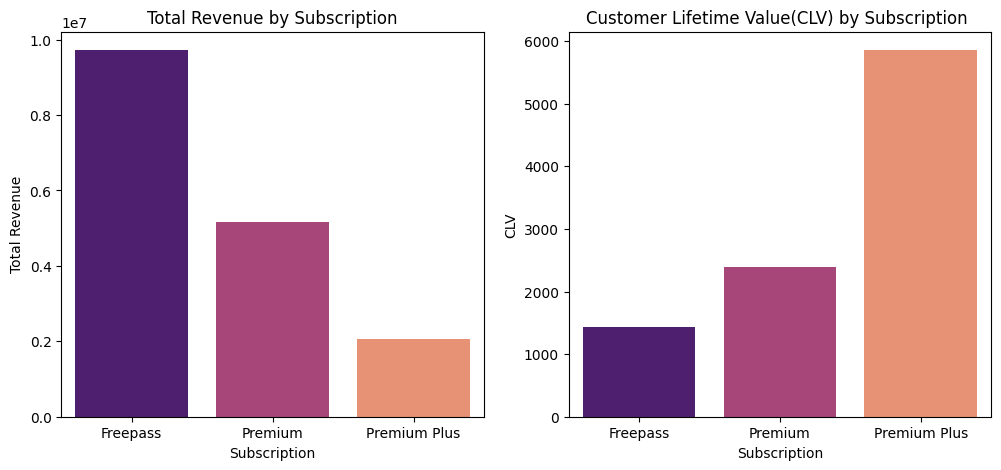

In [41]:
clv_data = valid_orders.groupby('Subscription').agg({
    'Total Order Value' : ['sum', 'mean'],
    'Customer ID' : 'nunique',
}).reset_index()

clv_data.columns = ['Subscription', 'Total Revenue', 'Average Order Value', 'Unique Customers']
clv_data['CLV'] = clv_data['Average Order Value'] * (valid_orders.shape[0]/ clv_data['Unique Customers'])
fig, ax = plt.subplots(1,2, figsize=(12, 5))

sns.barplot( x = 'Subscription', y= 'Total Revenue', data = clv_data, ax = ax[0], hue = 'Subscription', palette = 'magma')
ax[0].set_title('Total Revenue by Subscription')

sns.barplot(x = 'Subscription', y= 'CLV', data = clv_data, ax = ax[1],hue = 'Subscription', palette = 'magma')
ax[1].set_title('Customer Lifetime Value(CLV) by Subscription ')

plt.show()

In [88]:
# While the total revenue is highest for the Non-Subscription customers,
# the CLV is highest for the Premium Plus customers.

Impact On Revenue By Rating

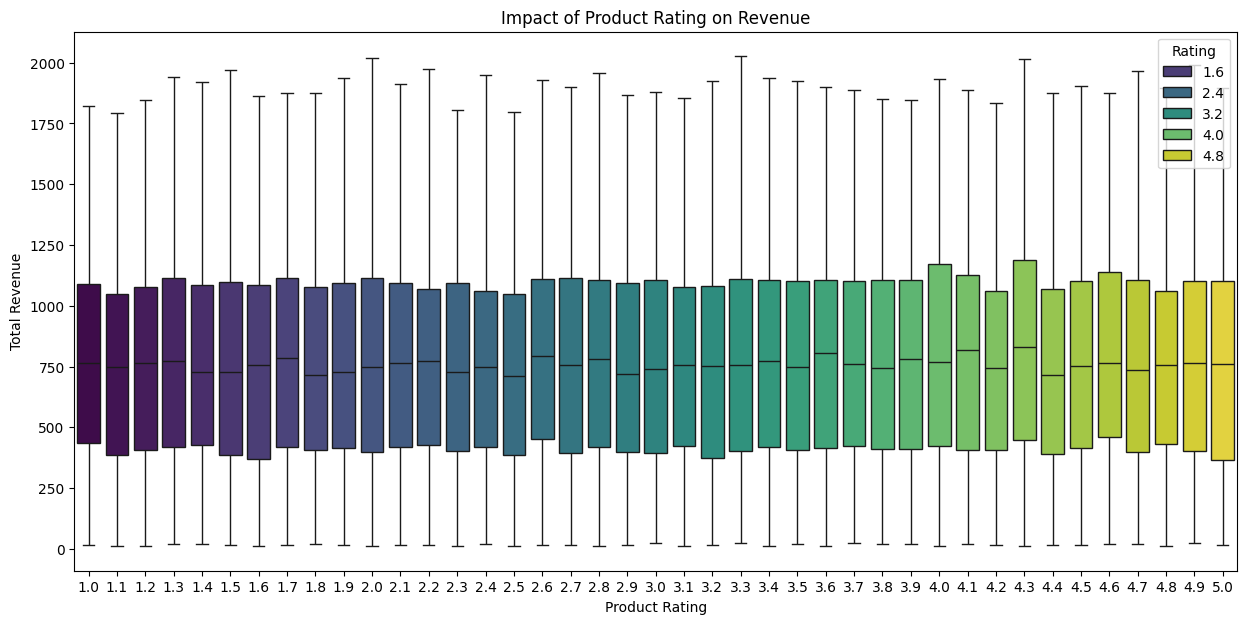

In [42]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Rating", y="Total Order Value", data=valid_orders, hue = 'Rating', palette="viridis")
plt.xlabel("Product Rating")
plt.ylabel("Total Revenue")
plt.title("Impact of Product Rating on Revenue")

# Set x-axis ticks correctly

plt.show()


In [89]:
# The distribution of toal REVENUE by product rating is almost similar for all ratings, 

Orders By Time Spent On Website

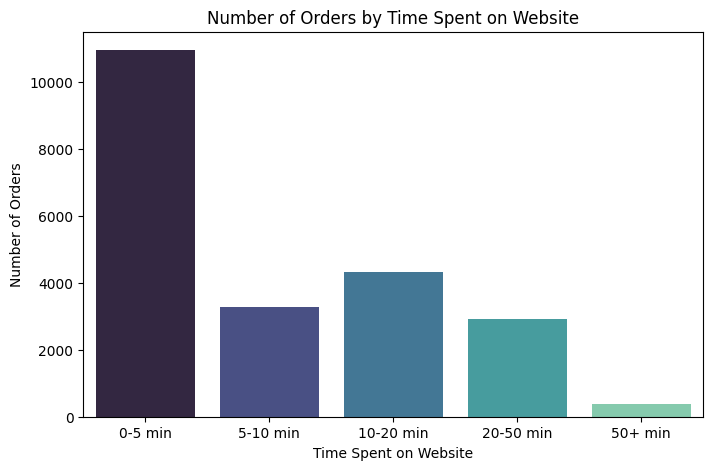

In [43]:
# Creating time spent bins
valid_orders["Time Category"] = pd.cut(valid_orders["Time Spent on Website"], 
                                       bins=[0, 5, 10, 20, 50, 100], 
                                       labels=["0-5 min", "5-10 min", "10-20 min", "20-50 min", "50+ min"])

# Count of orders by engagement level
time_analysis = valid_orders["Time Category"].value_counts().reset_index()
time_analysis.columns = ["Time Category", "Order Count"]

# Sorting categories correctly
time_analysis = time_analysis.sort_values(by="Time Category")

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x="Time Category", y="Order Count", data=time_analysis, hue = 'Time Category', palette="mako")
plt.xlabel("Time Spent on Website")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Time Spent on Website")
plt.show()


In [90]:
# The time spent on the website is not significantly correlated with the number of orders.
# Most of the orders are placed by customers who spent 0-5 minutes on the website

Impact On Revenue By Time Spent On Website

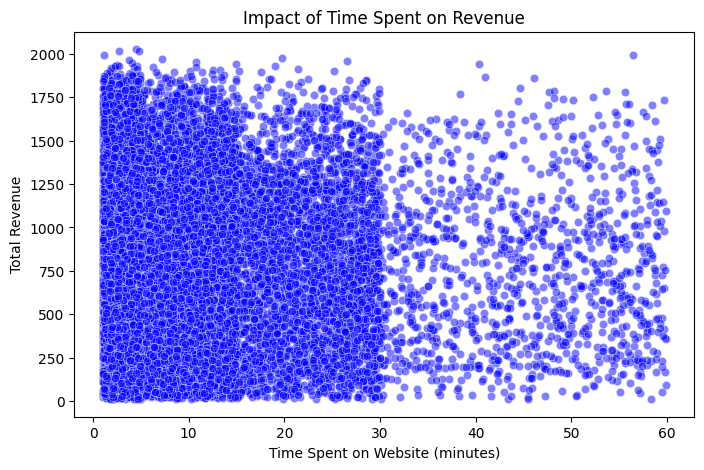

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=valid_orders["Time Spent on Website"], y=valid_orders["Total Order Value"], alpha=0.5, color="blue")
plt.xlabel("Time Spent on Website (minutes)")
plt.ylabel("Total Revenue")
plt.title("Impact of Time Spent on Revenue")
plt.show()


In [91]:
# The scatter plot shows a negative correlation between time spent on the website and total revenue,
# indicating that higher time spent is associated with lower revenue.

# Cancellation & Returns Analysis

In [45]:
cancellation_data = df[df['Order Status'] == 'Cancelled']
return_data = df[df['Order Status'] == 'Returned']  

In [46]:
# Total orders
total_orders = df.shape[0]

cancellation_rate = (cancellation_data.shape[0] / total_orders) * 100
return_rate = (return_data.shape[0] / total_orders) * 100

print(f"Cancellation Rate: {cancellation_rate:.2f}%")
print(f"Return Rate: {return_rate:.2f}%")


Cancellation Rate: 7.14%
Return Rate: 5.40%


Impact On Revenue

In [47]:
cancelled_revenue = cancellation_data['Discount Price'].sum()
returned_revenue = return_data['Discount Price'].sum()

print(f"Revenue Lost due to Cancellations: ₹{cancelled_revenue:,.2f}")
print(f"Revenue Lost due to Returns: ₹{returned_revenue:,.2f}")

Revenue Lost due to Cancellations: ₹1,291,113.32
Revenue Lost due to Returns: ₹1,014,165.07


Cancellation And Return Rates By Category

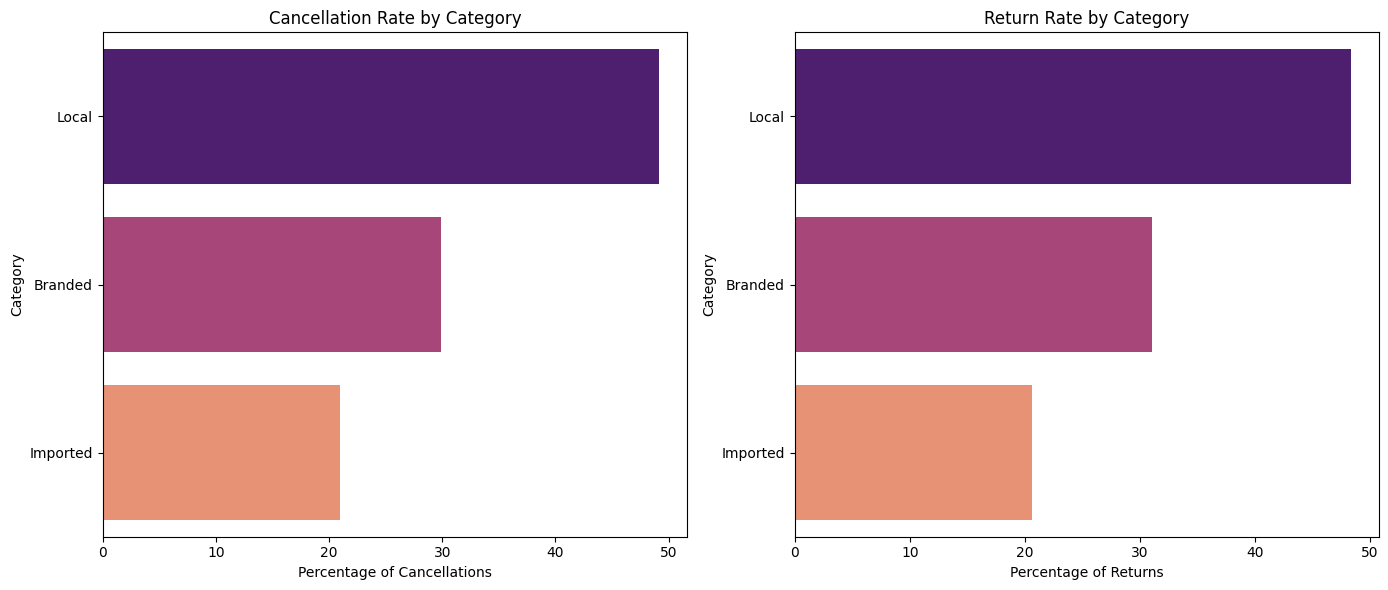

In [48]:
# Cancellation Rate by Category
cancel_by_category = cancellation_data["Category"].value_counts(normalize=True) * 100

# Return Rate by Category
return_by_category = return_data["Category"].value_counts(normalize=True) * 100

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(y=cancel_by_category.index, x=cancel_by_category.values, ax=ax[0],hue = cancel_by_category.index  ,palette="magma")
ax[0].set_title("Cancellation Rate by Category")
ax[0].set_xlabel("Percentage of Cancellations")
ax[0].set_ylabel("Category")

sns.barplot(y=return_by_category.index, x=return_by_category.values, ax=ax[1], hue = return_by_category.index, palette="magma")
ax[1].set_title("Return Rate by Category")
ax[1].set_xlabel("Percentage of Returns")
ax[1].set_ylabel("Category")

plt.tight_layout()
plt.show()


In [92]:
# The cancellation and return rates are highest for the Local Category products 
# most liekly due to local products also being the most sold products.

Top 3 Most Returned & Cancelled Products

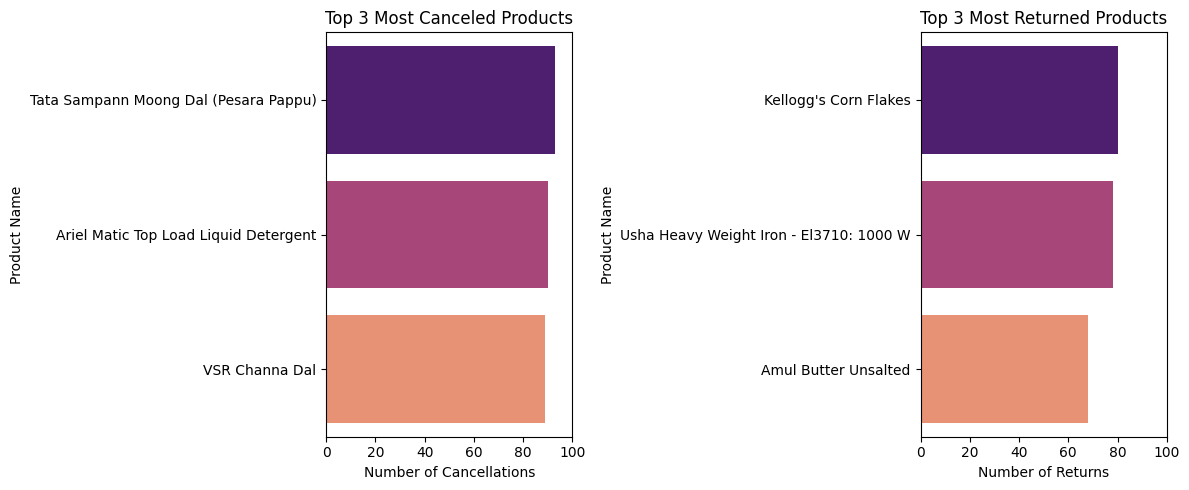

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 3 most canceled products
top_canceled = cancellation_data["Product Name"].value_counts().head(3)

# Top 3 most returned products
top_returned = return_data["Product Name"].value_counts().head(3)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Canceled Products
sns.barplot(y=top_canceled.index, x=top_canceled.values, ax=ax[0],hue = top_canceled.index, palette="magma")
ax[0].set_title("Top 3 Most Canceled Products")
ax[0].set_xlabel("Number of Cancellations")
ax[0].set_ylabel("Product Name")
ax[0].set_xlim(0, 100)

# Returned Products
sns.barplot(y=top_returned.index, x=top_returned.values, ax=ax[1],hue = top_returned.index, palette="magma")
ax[1].set_title("Top 3 Most Returned Products")
ax[1].set_xlabel("Number of Returns")
ax[1].set_ylabel("Product Name")
ax[1].set_xlim(0, 100)

plt.tight_layout()
plt.show()


In [95]:
# Tata Sampann Moong Dal(Pesara) is the most canceled product, while Kellogg's Cornflakes  is the most returned product.

Cancellation & Return Rate Trend By Month

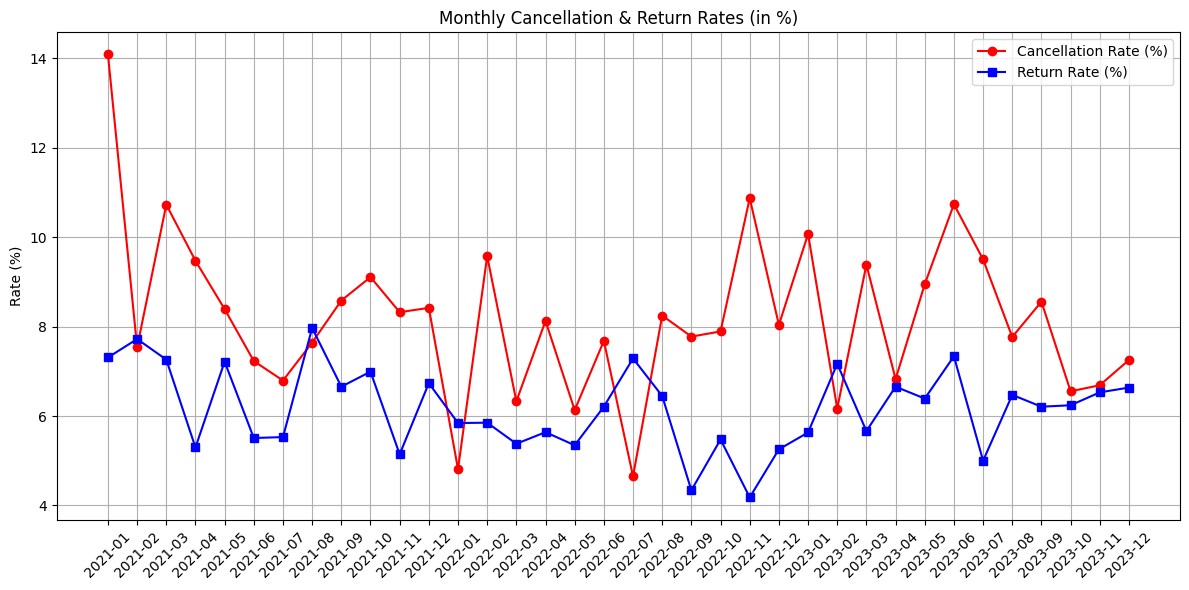

In [50]:
cancellation_data = cancellation_data.copy()
return_data = return_data.copy()

# Extract month in YYYY-MM format
valid_orders["Month"] = valid_orders["Order Date"].dt.strftime("%Y-%m")
cancellation_data["Month"] = cancellation_data["Order Date"].dt.strftime("%Y-%m")
return_data["Month"] = return_data["Order Date"].dt.strftime("%Y-%m")

# Create full list of months from valid_orders (this is the master list)
all_months = valid_orders["Month"].sort_values().unique()

# Count orders per month
total_orders_per_month = valid_orders["Month"].value_counts().reindex(all_months, fill_value=0)

# Count cancellations and returns per month
cancel_counts = cancellation_data["Month"].value_counts().reindex(all_months, fill_value=0)
return_counts = return_data["Month"].value_counts().reindex(all_months, fill_value=0)

# Calculate cancellation and return rate
cancel_rate = (cancel_counts / total_orders_per_month) * 100
return_rate = (return_counts / total_orders_per_month) * 100

# Combine into a DataFrame
rate_df = pd.DataFrame({
    "Month": all_months,
    "Cancellation Rate (%)": cancel_rate.values,
    "Return Rate (%)": return_rate.values
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(rate_df["Month"], rate_df["Cancellation Rate (%)"], marker="o", label="Cancellation Rate (%)", color="red")
plt.plot(rate_df["Month"], rate_df["Return Rate (%)"], marker="s", label="Return Rate (%)", color="blue")

plt.xticks(rotation=45)
plt.ylabel("Rate (%)")
plt.title("Monthly Cancellation & Return Rates (in %)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# While Returns Rate is almost stable throughout the months with minor spkies an dips, Cancellation Rate has few significant spkies and dips.
# The highest cancellation rate was in January 2021 with upto 14%, while the lowest was around 5% in July 2022.
